# SARS19-Covid Screen

*This notebook aims to provide some insight into the problematic of vaccination against SARS19-Covid disease in selected czech hospitals. These were not selected randomly as an arbitrary reader may assume, but the selection was motivated by personal interest of the author.*  


**List of the selected hospitals:**

* [Klatovská nemocnice](https://klatovy.nemocnicepk.cz/)
* [Domažlická nemocnice](https://domazlice.nemocnicepk.cz/)
* [Sušická nemocnice](https://susice.nemocnicepk.cz/)
* [Stodská nemocnice](https://stod.nemocnicepk.cz/)
* [Psychiatrická nemocnice v Dobřanech](https://www.pnvd.cz/)
* [Nemocnice Agel Říčany a.s.](https://nemocnicericany.agel.cz/index.html)
* [Fakultní nemocnice u sv. Anny v Brně](https://www.fnusa.cz/)
* [Fakultní nemocnice Královské Vinohrady](https://www.fnkv.cz/)
* [Městská poliklinika Praha - Spálená](https://www.prahamp.cz/)
* [Všeobecná fakultní nemocnice Praha](https://www.vfn.cz/)

Please remember, that there are many more hospitals in the country. Even some interesting and less known hospitals were not considered in this project, eg. [Nemocnice sv. Anny](https://svataanna.nemocnicepk.cz/) in [Planá](https://cs.wikipedia.org/wiki/Plan%C3%A1) or the one in [Horažďovice](https://cs.wikipedia.org/wiki/Hora%C5%BE%C4%8Fovice). **Especially only two hospitals located in the capital city Prague are involved here.**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Read csv file with data (statistical vaccination Covid data)
ImpfungVerbrauch = pd.read_csv('../data/ockovani-spotreba.csv')

def select_hospital(hospital, cols=['datum', 'pouzite_davky', 'ockovaci_latka']):
    """Select specific columns for a particular hospital."""
    df = ImpfungVerbrauch # only to make the next line more readable
    return df[df['ockovaci_misto_nazev'] == hospital][cols]

default_fig_kwargs = dict(
    x='datum',
    y='pouzite_davky',
    figsize=(15,5),
    legend=None,
)

## First breathtaking plots

*In following, the number of people vaccinated in the respective hospital is plotted against the date, on which the vaccination was reported. Please remember, that the numbers shown are not cummulative, that is, the plots show how the number daily vaccinated people is evolving in the selected hospitals. Data for all ten hospitals are successiv ploted.*

**Note: No normalization of the data was performed. The considered hospitals may very differ in its size. Be very careful to derive any conclusion from the shown plots!**

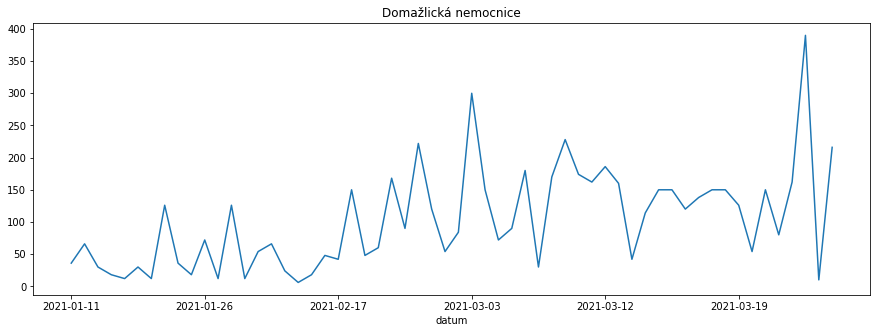

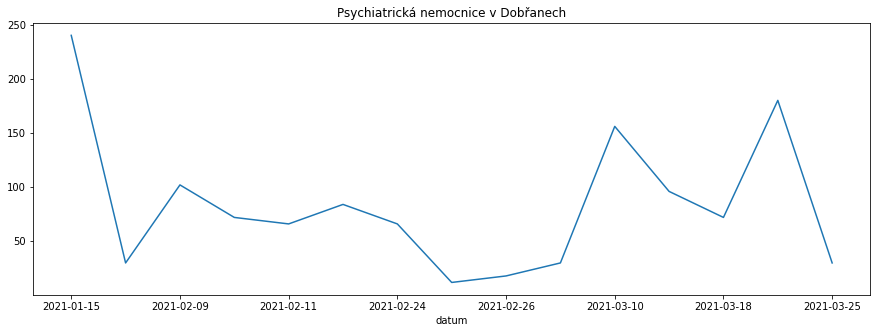

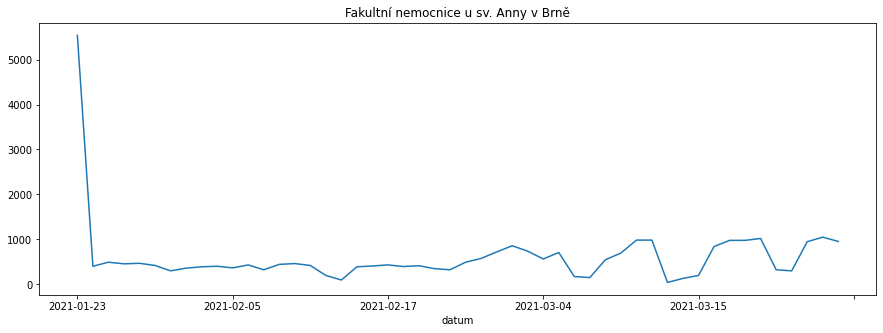

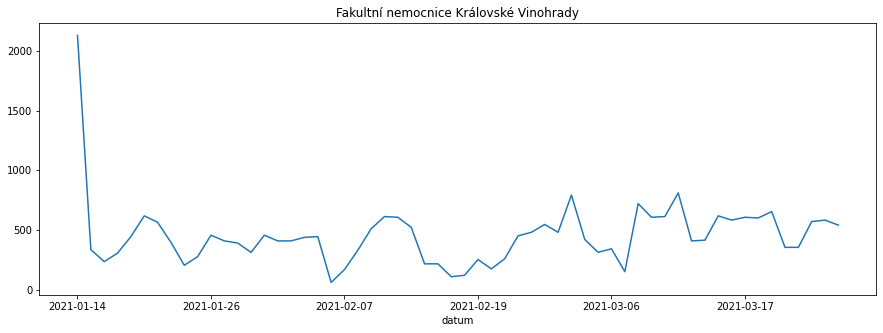

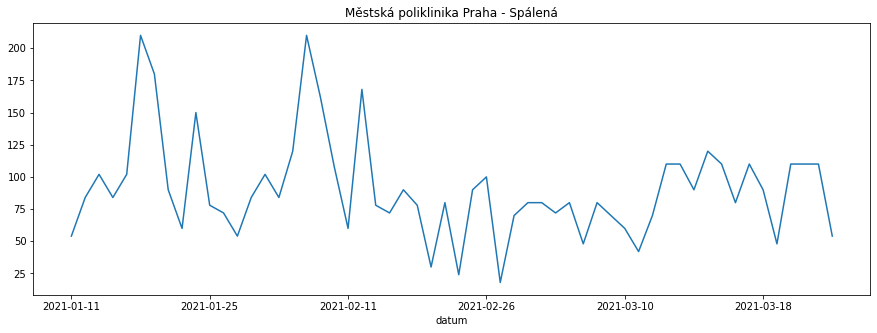

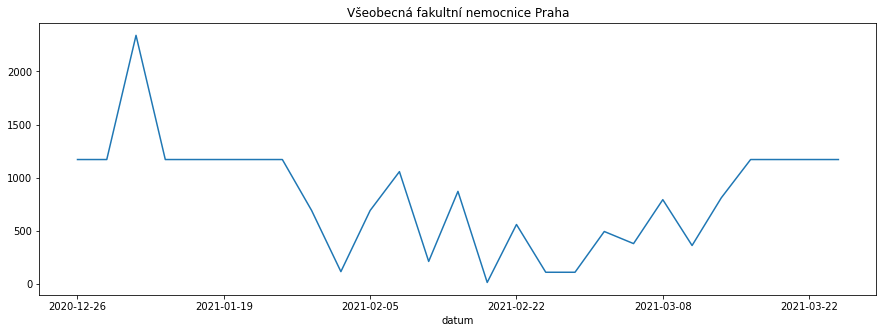

In [2]:
# Prepare a simple plot for all hospitals

for hospital in [
    "Klatovská nemocnice",
    "Domažlická nemocnice",
    "Sušická nemocnice",
    "Stodská nemocnice",
    "Psychiatrická nemocnice v Dobřanech",
    "Nemocnice Agel Říčany a.s.",
    "Fakultní nemocnice u sv. Anny v Brně",
    "Fakultní nemocnice Královské Vinohrady",
    "Městská poliklinika Praha - Spálená",
    "Všeobecná fakultní nemocnice Praha"
]:
    select_hospital(hospital).plot(title=hospital, **default_fig_kwargs)

## Type of used vaccination

As you maybe already know, there are many types and especially many different vaccines for Covid. In case you are interested in that aspect, please see [Different COVID-19 Vaccines](https://www.cdc.gov/coronavirus/2019-ncov/vaccines/different-vaccines.html).

Some interesting plots that focus on this aspect follow.

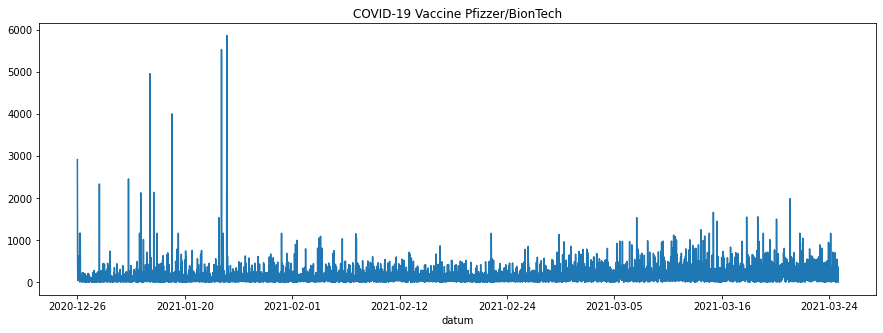

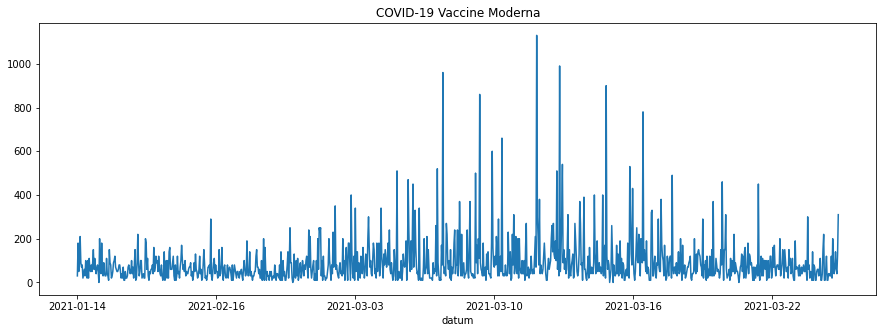

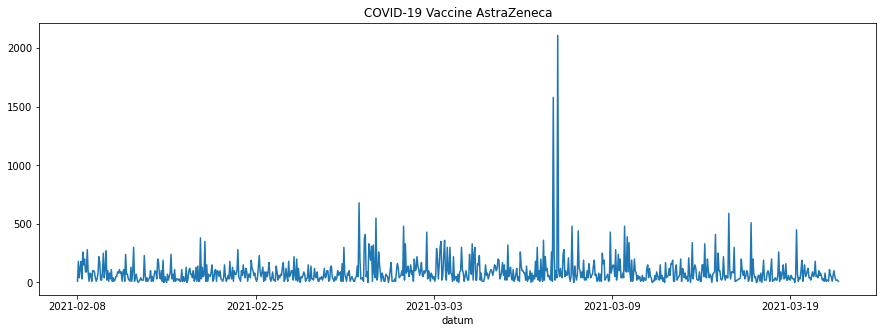

In [3]:
for label, title in (
    ("Comirnaty", "COVID-19 Vaccine Pfizzer/BionTech"),
    ("COVID-19 Vaccine Moderna", None),
    ("COVID-19 Vaccine AstraZeneca", None)
):
    title = title if title else label
    ImpfungVerbrauch.query(f"ockovaci_latka == '{label}'").plot(title=title, **default_fig_kwargs)

Plot of overall vaccinations with Moderna vaccine:

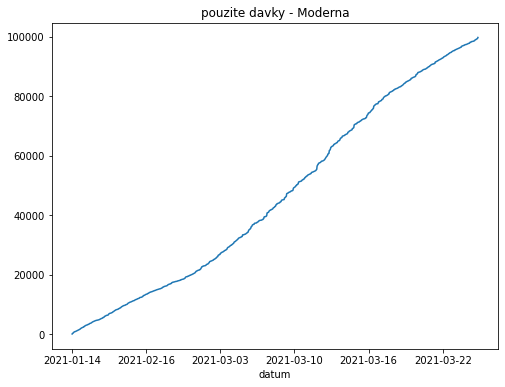

In [4]:
ImpfungVerbrauch.query(
    f"ockovaci_latka == 'COVID-19 Vaccine Moderna'"
).set_index("datum")['pouzite_davky'].cumsum().plot(figsize=(8, 6))

plt.title("pouzite davky - Moderna");